In [1]:
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt

# 1. Fighter Data

In [2]:
fighter_df = pd.read_csv("ufc_scrape/data_fighters.csv")

In [3]:
fighter_df.head()

,name,record,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg
0,\n Hunter Azure\n\n,\n Record: 8-0-0\n,"\n ,\n 5' 8""\n","\n ,\n 135 lbs.\n","\n ,\n 69""\n","\n ,\n Orthodox\n","\n ,\n \n Mar 02, 1992\n ...","\n ,\n\n 4.00\n\n","\n ,\n 50%\n","\n ,\n 1.57\n","\n ,\n 56%\n","\n ,\n 2.00\n","\n ,\n 33%\n","\n ,\n 75%\n","\n ,\n 2.5\n"
1,\n Michael Byrnes\n\n,\n Record: 5-2-0\n,"\n ,\n 5' 11""\n","\n ,\n 155 lbs.\n","\n ,\n --\n","\n ,\n \n","\n ,\n \n Jul 17, 1990\n ...","\n ,\n\n 0.00\n\n","\n ,\n 0%\n","\n ,\n 0.00\n","\n ,\n 0%\n","\n ,\n 0.00\n","\n ,\n 0%\n","\n ,\n 0%\n","\n ,\n 0.0\n"
2,\n Gleidson Cutis\n\n,\n Record: 7-3-0\n,"\n ,\n 5' 9""\n","\n ,\n 155 lbs.\n","\n ,\n --\n","\n ,\n Orthodox\n","\n ,\n \n Feb 07, 1989\n ...","\n ,\n\n 2.99\n\n","\n ,\n 52%\n","\n ,\n 8.28\n","\n ,\n 59%\n","\n ,\n 0.00\n","\n ,\n 0%\n","\n ,\n 0%\n","\n ,\n 0.0\n"
3,\n Rolando Dy\n\n,\n Record: 9-7-1 (1 NC)\n ...,"\n ,\n 5' 8""\n","\n ,\n 145 lbs.\n","\n ,\n 69""\n","\n ,\n Orthodox\n","\n ,\n \n Aug 11, 1990\n ...","\n ,\n\n 3.04\n\n","\n ,\n 37%\n","\n ,\n 4.47\n","\n ,\n 52%\n","\n ,\n 0.30\n","\n ,\n 20%\n","\n ,\n 68%\n","\n ,\n 0.0\n"
4,\n Jessica Eye\n\n,\n Record: 15-7-0 (1 NC)\n ...,"\n ,\n 5' 6""\n","\n ,\n 125 lbs.\n","\n ,\n 66""\n","\n ,\n Orthodox\n","\n ,\n \n Jul 27, 1986\n ...","\n ,\n\n 3.79\n\n","\n ,\n 38%\n","\n ,\n 3.39\n","\n ,\n 59%\n","\n ,\n 0.46\n","\n ,\n 45%\n","\n ,\n 59%\n","\n ,\n 0.7\n"


In [4]:
len(fighter_df)

3414

In [5]:
fighter_df.duplicated(subset=None).sum()

0

In [6]:
fighter_df = fighter_df.replace(['\n',','],'', regex=True)

In [7]:
fighter_df = fighter_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [8]:
fighter_df.isnull().sum()

name       0
record     0
height     0
weight     0
reach      0
stance     0
dob        0
slmp       0
str_acc    0
ssapm      0
str_def    0
td_avg     0
td_acc     0
td_def     0
sub_avg    0
dtype: int64

In [9]:
percentage_columns = ['str_acc','str_def','td_acc','td_def']
for column in percentage_columns:
    fighter_df[column] = fighter_df[column].str.replace('%','.0').astype(float)/100

In [10]:
fighter_df['record'] = fighter_df['record'].str.replace('Record: ','', regex=True)

In [11]:
fighter_df[['wins','losses','draws']] = fighter_df['record'].str.split('-', expand=True)
fighter_df['draws'] = fighter_df['draws'].str.split(' ').str[0]
fighter_df.drop(columns=['record'], inplace=True)

In [12]:
fighter_df['weight'] = fighter_df['weight'].str.replace(' lbs.', '', regex=True)

In [13]:
fighter_df['reach'] = fighter_df['reach'].str.replace('"', '', regex=True)

In [14]:
now = pd.Timestamp('now')
fighter_df['dob'] = pd.to_datetime(fighter_df['dob'], format='%b %d %Y', errors='coerce')
fighter_df['dob'] = fighter_df['dob'].where(fighter_df['dob'] < now, fighter_df['dob'] -  np.timedelta64(100, 'Y'))
fighter_df['age'] = (now - fighter_df['dob']).astype('<m8[Y]')

In [15]:
fighter_df['height'] = fighter_df['height'].replace([' ','"'],'', regex=True)
fighter_df[['feet','inches']] = fighter_df['height'].str.split("'", expand=True)
fighter_df['feet'] = fighter_df['feet'].replace('--','', regex=True)

fighter_df['feet'] = pd.to_numeric(fighter_df['feet'])
fighter_df['inches'] = pd.to_numeric(fighter_df['inches'])

fighter_df['height'] = round((fighter_df['feet']*0.3048) + (fighter_df['inches']*0.0254), 2)

fighter_df.drop(columns=['feet','inches'], inplace=True)

In [16]:
fighter_df = fighter_df.replace('--', np.nan, regex=True)
fighter_df['reach'] = pd.to_numeric(fighter_df['reach'])
fighter_df['reach'] = round(fighter_df['reach']*0.0254, 2)

In [17]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age
0,Hunter Azure,1.73,135,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0
1,Michael Byrnes,1.80,155,NaN,,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0
2,Gleidson Cutis,1.75,155,NaN,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0
3,Rolando Dy,1.73,145,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0
4,Jessica Eye,1.68,125,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0


In [18]:
fighter_df.isnull().sum()

name          0
height      258
weight       75
reach      1716
stance        0
dob         740
slmp          0
str_acc       0
ssapm         0
str_def       0
td_avg        0
td_acc        0
td_def        0
sub_avg       0
wins          0
losses        0
draws         0
age         740
dtype: int64

In [19]:
reach_df = fighter_df.dropna(subset=['reach'])

In [20]:
round(reach_df['height'].sum(),1)

3022.9

In [21]:
round(reach_df['reach'].sum(),1)

3096.8

In [22]:
fighter_df['reach'].fillna(fighter_df['height'], inplace=True)
fighter_df['height'].fillna(fighter_df['reach'], inplace=True)

In [23]:
fighter_df.isnull().sum()

name         0
height     257
weight      75
reach      257
stance       0
dob        740
slmp         0
str_acc      0
ssapm        0
str_def      0
td_avg       0
td_acc       0
td_def       0
sub_avg      0
wins         0
losses       0
draws        0
age        740
dtype: int64

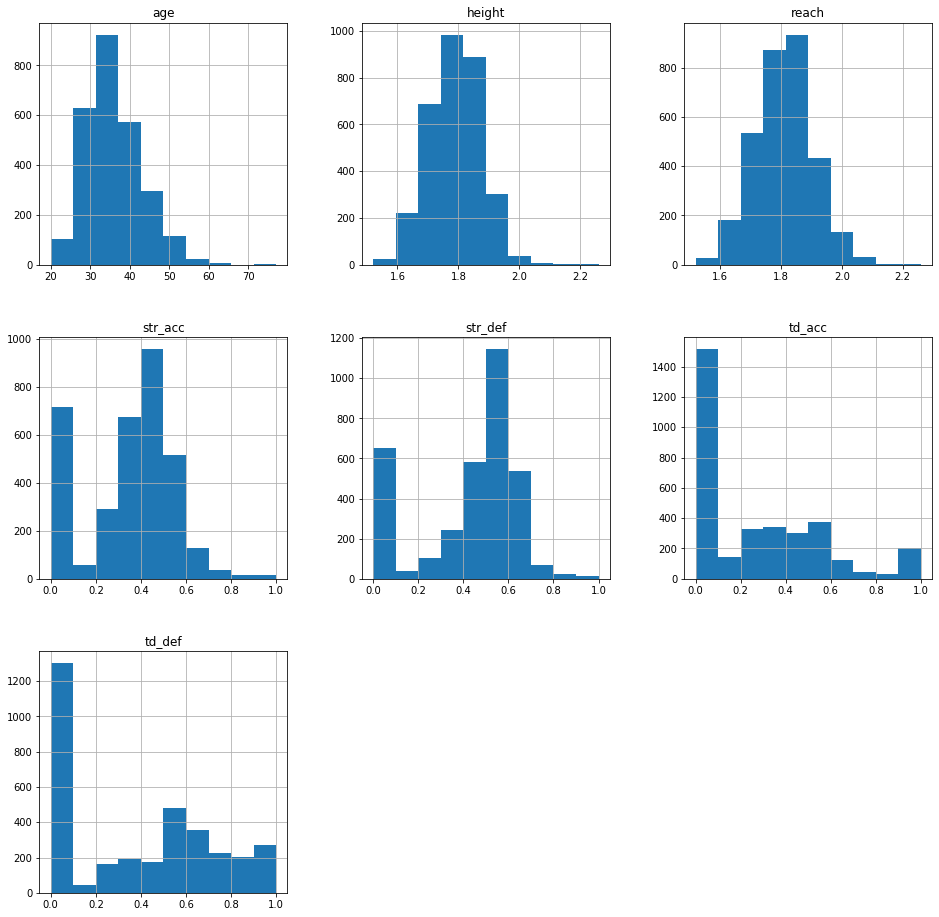

In [24]:
fighter_df.hist(bins=10, figsize=(16,16))
plt.show()

In [25]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age
0,Hunter Azure,1.73,135,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0
1,Michael Byrnes,1.80,155,1.80,,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0
2,Gleidson Cutis,1.75,155,1.75,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0
3,Rolando Dy,1.73,145,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0
4,Jessica Eye,1.68,125,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0


# 2. Bout Data

In [26]:
bout_df = pd.read_csv("ufc_scrape/data_fights.csv")

In [27]:
bout_df.head()

,f1_name,f2_name,f1_str,f2_str,f1_tds,f2_tds,f1_subs,f2_subs,f1_pass,f2_pass,weight_class,method,finisher,round_num,time,event_name,event_date
0,\n Anthony Smith\n,\n Alexander Gustafsson\n ...,49,72,0,1,1,0,1,1,\n Light Heavyweight,\n \n \n\n SUB\n\n,\n Rear Naked Choke\n,4,\n\n \n 2:38\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
1,\n Aleksandar Rakic\n,\n Jimi Manuwa\n,2,2,0,0,0,0,0,0,\n Light Heavyweight,\n \n \n\n KO/TKO\n\n,\n Kick\n,1,\n\n \n 0:47\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
2,\n Makwan Amirkhani\n,\n Chris Fishgold\n,9,16,1,0,1,0,2,0,\n Featherweight,\n \n \n\n SUB\n\n,\n Anaconda Choke\n,2,\n\n \n 4:25\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
3,\n Christos Giagos\n,\n Damir Hadzovic\n,47,24,6,1,0,0,3,0,\n Lightweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
4,\n Daniel Teymur\n,\n Sung Bin Jo\n,40,21,1,1,0,1,0,0,\n Featherweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"


In [28]:
bout_df.duplicated(subset=None).sum()

0

In [29]:
bout_df = bout_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [30]:
bout_df = bout_df.replace(['\n',','],'', regex=True)

In [31]:
bout_df[['minutes', 'seconds']] = bout_df['time'].str.split(':', expand=True)

In [32]:
num_columns = ['f1_str', 
               'f2_str', 
               'f1_tds', 
               'f2_tds', 
               'f1_subs', 
               'f2_subs', 
               'f1_pass', 
               'f2_pass',
               'round_num',
               'minutes',
               'seconds']

In [33]:
bout_df = bout_df[['event_name','event_date']]

In [34]:
bout_df['event_date'] = pd.to_datetime(bout_df['event_date'], format='%B %d %Y')

ValueError: time data '      June 01 2019' does not match format '%B %d %Y' (match)

In [35]:
bout_df

,event_name,event_date
0,UFC Fight Night: Gustafsson vs. Smith,June 01 2019
1,UFC Fight Night: Gustafsson vs. Smith,June 01 2019
2,UFC Fight Night: Gustafsson vs. Smith,June 01 2019
3,UFC Fight Night: Gustafsson vs. Smith,June 01 2019
4,UFC Fight Night: Gustafsson vs. Smith,June 01 2019
...,...,...
5530,UFC Fight Night: Lee vs. Oliveira,March 14 2020
5531,UFC Fight Night: Lee vs. Oliveira,March 14 2020
5532,UFC Fight Night: Lee vs. Oliveira,March 14 2020
5533,UFC Fight Night: Lee vs. Oliveira,March 14 2020


In [36]:
bout_df[num_columns] = bout_df[num_columns].apply(pd.to_numeric, errors='coerce')

KeyError: "None of [Index(['f1_str', 'f2_str', 'f1_tds', 'f2_tds', 'f1_subs', 'f2_subs', 'f1_pass',\n       'f2_pass', 'round_num', 'minutes', 'seconds'],\n      dtype='object')] are in the [columns]"

In [ ]:
bout_df['fight_time'] = round((5*(bout_df['round_num']-1)) + bout_df['minutes'] + (bout_df['seconds']/60), 2)

In [37]:
bout_df.drop(columns=['round_num','time','minutes','seconds'], inplace=True)

KeyError: "['round_num' 'time' 'minutes' 'seconds'] not found in axis"

In [38]:
bout_df.head()

,event_name,event_date
0,UFC Fight Night: Gustafsson vs. Smith,June 01 2019
1,UFC Fight Night: Gustafsson vs. Smith,June 01 2019
2,UFC Fight Night: Gustafsson vs. Smith,June 01 2019
3,UFC Fight Night: Gustafsson vs. Smith,June 01 2019
4,UFC Fight Night: Gustafsson vs. Smith,June 01 2019


In [39]:
winner_df = bout_df[['f1_name','weight_class','event_date']]
winner_df.rename(columns={'f1_name':'name'}, inplace=True)

KeyError: "['weight_class', 'f1_name'] not in index"

In [40]:
loser_df = bout_df[['f2_name','weight_class','event_date']]
loser_df.rename(columns={'f2_name':'name'}, inplace=True)

KeyError: "['f2_name', 'weight_class'] not in index"

In [41]:
stacked_df = pd.concat([winner_df, loser_df], axis=0)

NameError: name 'winner_df' is not defined

In [42]:
stacked_df

NameError: name 'stacked_df' is not defined

In [177]:
# bout_df.hist(bins=20, figsize=(16,16))
# plt.show()

In [178]:
bout_df.isnull().sum()

f1_name         0
f2_name         0
f1_str          0
f2_str          0
f1_tds          0
f2_tds          0
f1_subs         0
f2_subs         0
f1_pass         0
f2_pass         0
weight_class    0
method          0
finisher        0
event_name      0
event_date      0
fight_time      0
dtype: int64

In [179]:
merged_df = pd.merge(fighter_df[['name','height','weight','reach']], stacked_df, left_on='name', right_on='name')
# merged_df.drop(columns=['f1_name','f2_name'], inplace=True)

In [180]:
merged_df.sort_values(by='name', inplace=True)

In [181]:
merged_df = pd.DataFrame(merged_df.groupby('name').weight_class.apply(lambda x: x.mode()).reset_index())
merged_df.drop(columns=['level_1'], inplace=True)

In [182]:
merged_df

,name,weight_class
0,Aalon Cruz,Featherweight
1,Aaron Brink,Heavyweight
2,Aaron Phillips,Bantamweight
3,Aaron Phillips,Featherweight
4,Aaron Riley,Lightweight
...,...,...
2115,Zarah Fairn,Women's Featherweight
2116,Zelim Imadaev,Welterweight
2117,Zhang Lipeng,Lightweight
2118,Zu Anyanwu,Heavyweight


In [187]:
merged_df['weight_class'].value_counts()

Lightweight              384
Welterweight             360
Middleweight             284
Heavyweight              217
Featherweight            188
Bantamweight             174
Light Heavyweight        170
Open Weight               85
Flyweight                 77
Women's Strawweight       70
Women's Bantamweight      58
Women's Flyweight         43
Women's Featherweight      7
Catch Weight               3
Name: weight_class, dtype: int64

In [47]:
merged_df.rename(columns={'weight_class':'most_common_weight_class'}, inplace=True)

In [48]:
fighter_df = fighter_df.merge(merged_df[['name','most_common_weight_class']], how='left')

In [49]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age,most_common_weight_class
0,Hunter Azure,1.73,135,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0,Bantamweight
1,Michael Byrnes,1.80,155,1.80,,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0,NaN
2,Gleidson Cutis,1.75,155,1.75,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0,NaN
3,Rolando Dy,1.73,145,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0,Featherweight
4,Jessica Eye,1.68,125,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0,Women's Bantamweight


In [50]:
fighter_df_grouped = fighter_df.groupby(by='most_common_weight_class').mean().reset_index()

In [51]:
fighter_df_grouped

,most_common_weight_class,height,reach,str_acc,str_def,td_acc,td_def,age
0,Bantamweight,1.708125,1.744830,0.402330,0.553125,0.339148,0.555625,32.437500
1,Catch Weight,1.770000,1.763333,0.340000,0.523333,0.406667,0.506667,38.666667
2,Featherweight,1.747234,1.786011,0.420160,0.550638,0.328830,0.535745,32.239362
3,Flyweight,1.666667,1.692308,0.392949,0.558333,0.318077,0.569872,31.692308
4,Heavyweight,1.891343,1.921759,0.387097,0.418018,0.285346,0.411382,40.052356
5,Light Heavyweight,1.865207,1.906272,0.449824,0.505647,0.315647,0.503471,37.159509
6,Lightweight,1.769764,1.803622,0.375429,0.508779,0.312260,0.465091,35.474719
7,Middleweight,1.835176,1.870563,0.409648,0.487641,0.345317,0.471479,37.575188
8,Open Weight,1.849024,1.849390,0.058588,0.049176,0.050824,0.047647,52.620690
9,Welterweight,1.806750,1.843167,0.407167,0.519778,0.360250,0.509833,36.011429


In [52]:
fighter_df = fighter_df.replace('--','', regex=True)

In [62]:
bout_df.replace('', np.nan, inplace=True)

In [54]:
fighter_df[['weight','slmp','ssapm','td_avg','sub_avg']] = fighter_df[['weight','slmp','ssapm','td_avg','sub_avg']].astype(float, errors='ignore')
fighter_df[['wins','losses','draws']] = fighter_df[['wins','losses','draws']].astype(int, errors='ignore')

In [55]:
# merged_df = pd.DataFrame(merged_df.groupby('name').weight_class.apply(lambda x: x.mode()).reset_index())

In [56]:
dummy_df = pd.DataFrame(fighter_df.groupby('weight')['most_common_weight_class'].apply(lambda x: x.mode()).reset_index())

In [57]:
dummy_df

,weight,level_1,most_common_weight_class
0,115.0,0,Women's Strawweight
1,125.0,0,Flyweight
2,135.0,0,Bantamweight
3,145.0,0,Featherweight
4,155.0,0,Lightweight
...,...,...,...
79,350.0,0,Open Weight
80,400.0,0,Open Weight
81,410.0,0,Open Weight
82,430.0,0,Open Weight


In [58]:
fighter_df

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age,most_common_weight_class
0,Hunter Azure,1.73,135.0,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0,Bantamweight
1,Michael Byrnes,1.80,155.0,1.80,NaN,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0,NaN
2,Gleidson Cutis,1.75,155.0,1.75,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0,NaN
3,Rolando Dy,1.73,145.0,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0,Featherweight
4,Jessica Eye,1.68,125.0,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0,Women's Bantamweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,Ricky Rainey,1.85,170.0,1.96,Switch,1983-06-29,2.55,0.48,2.62,0.46,0.95,0.18,0.55,0.0,13,6,0,36.0,Welterweight
3522,Amir Rahnavardi,1.83,205.0,1.83,Orthodox,1974-12-07,0.67,0.25,0.00,1.00,0.00,0.00,0.50,0.0,11,10,0,45.0,NaN
3523,Josh Rafferty,1.83,170.0,1.83,Orthodox,1981-01-06,0.60,0.33,3.60,0.50,0.00,0.00,0.00,9.0,9,8,0,39.0,Welterweight
3524,Gilbert Rael,1.73,155.0,1.73,NaN,NaT,0.00,0.00,7.46,0.37,4.86,1.00,0.00,0.0,1,3,0,NaN,NaN


In [ ]:
fill_mode = lambda x: x.fillna(x.mode())

In [ ]:
fighter_df.groupby('weight')

In [63]:
bout_df.isnull().sum()

f1_name            0
f2_name            0
f1_str             0
f2_str             0
f1_tds             0
f2_tds             0
f1_subs            0
f2_subs            0
f1_pass            0
f2_pass            0
weight_class       0
method             0
finisher        2681
event_name         0
event_date         0
fight_time         0
dtype: int64

In [59]:
fighter_df.isnull().sum()

name                           0
height                       257
weight                        75
reach                        257
stance                       847
dob                          750
slmp                           0
str_acc                        0
ssapm                          0
str_def                        0
td_avg                         0
td_acc                         0
td_def                         0
sub_avg                        0
wins                           0
losses                         0
draws                          0
age                          750
most_common_weight_class    1402
dtype: int64

In [ ]:
weight_class_df = pd.DataFrame(fighter_df.groupby('weight')['most_common_weight_class'].apply(lambda x: x.mode()).reset_index())

In [ ]:
weight_class_df.head()

In [ ]:
fighter_df.head()

In [ ]:
fighter_df['most_common_weight_class'].unique()

In [ ]:
fighter_df['most_common_weight_class'].isnull().sum()

In [ ]:
for i, row in fighter_df.iterrows():
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] < 115):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Strawweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 115) and (row['weight'] <= 125):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Flyweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 125) and (row['weight'] <= 135):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Bantamweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 135) and (row['weight'] <= 145):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Featherweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 145) and (row['weight'] <= 155):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Lightweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 155) and (row['weight'] <= 170):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Welterweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 170) and (row['weight'] <= 185):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Middleweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 185) and (row['weight'] <= 205):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Middleweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 205):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Heavyweight'
    else:
        pass

In [ ]:
fighter_df.head()

In [ ]:
fighter_df['height'] = fighter_df.groupby('most_common_weight_class')['height'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
fighter_df.head()

In [ ]:
fighter_df.isnull().sum()

In [ ]:
fighter_df.groupby('most_common_weight_class').mean()

In [ ]:
pd.isnull(np.nan)